In [1]:
import sys
sys.path.append("/home/kelvin/src/minivnatiny")

import minivnatiny
import numpy as np
import skrf
import matplotlib.pyplot as plt

In [2]:
vna = minivnatiny.VNA("/dev/ttyUSB0")

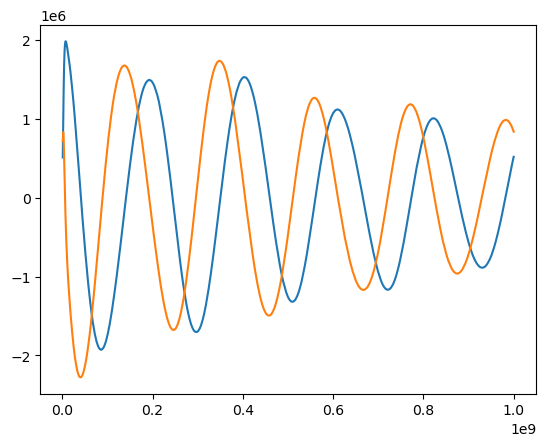

In [4]:
fs, iq_open = vna.raw_iq_refl(1e+6, 1e+9, 1000)

plt.plot(fs, np.real(iq_open))
plt.plot(fs, np.imag(iq_open))
plt.show()

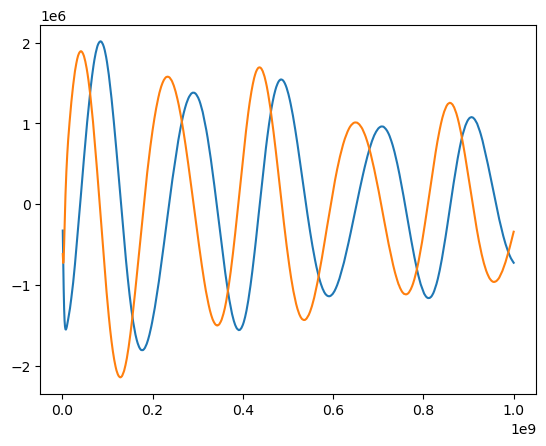

In [5]:
# swapped out terminations here obviously
fs, iq_short = vna.raw_iq_refl(1e+6, 1e+9, 1000)

plt.plot(fs, np.real(iq_short))
plt.plot(fs, np.imag(iq_short))
plt.show()

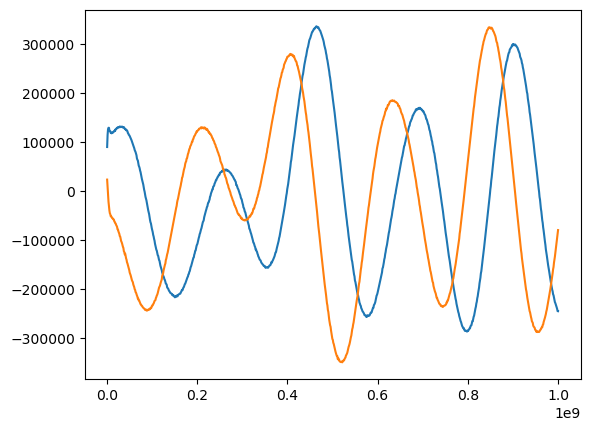

In [3]:
fs, iq_load = vna.raw_iq_refl(1e+6, 1e+9, 1000)

plt.plot(fs, np.real(iq_load))
plt.plot(fs, np.imag(iq_load))
plt.show()

In [12]:
cal = minivnatiny.SOLCalibration(fs, iq_short, iq_open, iq_load)
cal_vna = minivnatiny.CalibratedVNA(vna, cal)

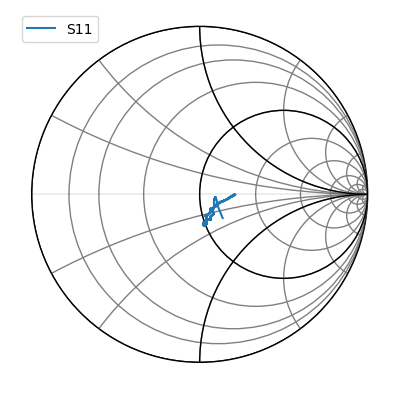

In [14]:
net = cal_vna.scan_s11(1e+6, 1e+9, 1000)
net.plot_s_smith()
plt.show()